Проект "Платежная воронка".

Описание: Был проведен А/B-тест, чтобы проверить новую платёжную воронку: гипотеза заключалась в том, что новая платёжная воронка увеличит конверсию в покупку. 

Цель:Проанализировать результаты А/B-теста.

In [36]:
#Импортируем все необходимые библиотеки для дальнейшей работы:

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import numpy as np

from statsmodels.stats.proportion import proportions_ztest

In [37]:
#Выгрузим все датафреймы и выведим информацию о них:

new_users = pd.read_csv('https://code.s3.yandex.net/datasets/new_users_test_2025.csv')
new_users.info()
new_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131486 entries, 0 to 131485
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     131486 non-null  object
 1   first_date  131486 non-null  object
 2   region      131486 non-null  object
 3   device      131486 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2025-06-01,South Asia,iPhone
1,F1C668619DFE6E65,2025-06-01,Southeast Asia,iPhone
2,2E1BF1D4C37EA01F,2025-06-01,Central Asia,Mac
3,50734A22C0C63768,2025-06-01,Central Asia,Android
4,E1BDDCE0DAFA2679,2025-06-01,Southeast Asia,iPhone


In [38]:
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_test_2025.csv')
sessions_test.info()
sessions_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491443 entries, 0 to 491442
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           491443 non-null  object 
 1   session_start     491443 non-null  object 
 2   session_duration  491443 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.2+ MB


,user_id,session_start,session_duration
0,D72A72121175D8BE,2025-06-01 05:51:20,1.0
1,F1C668619DFE6E65,2025-06-01 15:28:14,5.0
2,2E1BF1D4C37EA01F,2025-06-01 16:19:36,3.0
3,50734A22C0C63768,2025-06-01 21:06:51,1.0
4,E1BDDCE0DAFA2679,2025-06-01 10:03:00,2.0


In [39]:
purchases_test = pd.read_csv('https://code.s3.yandex.net/datasets/purchases_test_2025.csv')
purchases_test.info()
purchases_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149152 entries, 0 to 149151
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   149152 non-null  object 
 1   event_dt  149152 non-null  object 
 2   revenue   149152 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


,user_id,event_dt,revenue
0,50734A22C0C63768,2025-06-01 21:06:51,4.99
1,0FC21E6F8FAA8DEC,2025-06-01 06:36:08,4.99
2,9CD9F34546DF254C,2025-06-01 14:40:29,99.99
3,1FD7660FDF94CA1F,2025-06-01 04:53:00,4.99
4,E6AF85675078215D,2025-06-01 11:40:09,4.99


In [40]:
participants_test = pd.read_csv('https://code.s3.yandex.net/datasets/participants_test_2025.csv')
participants_test.info()
participants_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  3291 non-null   object
 1   group    3291 non-null   object
 2   ab_test  3291 non-null   object
dtypes: object(3)
memory usage: 77.3+ KB


,user_id,group,ab_test
0,6A8825D752FCFFB6,A,new_payment_funnel_test_summer_2025
1,0B75608CBBA59791,B,new_payment_funnel_test_summer_2025
2,6B9D2F7685B83C73,A,new_payment_funnel_test_summer_2025
3,6435D4C2E66A7F75,B,new_payment_funnel_test_summer_2025
4,4F815438BBD2BB7E,A,new_payment_funnel_test_summer_2025


In [41]:
#Приведем необходимые данные к типу дата:

pd.to_datetime(new_users['first_date'])

0        2025-06-01
1        2025-06-01
2        2025-06-01
3        2025-06-01
4        2025-06-01
            ...    
131481   2025-06-28
131482   2025-06-28
131483   2025-06-28
131484   2025-06-28
131485   2025-06-28
Name: first_date, Length: 131486, dtype: datetime64[ns]

In [42]:
pd.to_datetime(sessions_test['session_start'])

0        2025-06-01 05:51:20
1        2025-06-01 15:28:14
2        2025-06-01 16:19:36
3        2025-06-01 21:06:51
4        2025-06-01 10:03:00
                 ...        
491438   2025-06-22 17:03:30
491439   2025-07-05 21:49:44
491440   2025-07-02 16:45:20
491441   2025-06-26 07:27:40
491442   2025-06-26 02:41:52
Name: session_start, Length: 491443, dtype: datetime64[ns]

In [43]:
pd.to_datetime(purchases_test['event_dt'])

0        2025-06-01 21:06:51
1        2025-06-01 06:36:08
2        2025-06-01 14:40:29
3        2025-06-01 04:53:00
4        2025-06-01 11:40:09
                 ...        
149147   2025-07-11 12:58:09
149148   2025-06-28 15:54:27
149149   2025-07-06 07:32:10
149150   2025-07-11 04:04:04
149151   2025-06-23 08:34:23
Name: event_dt, Length: 149152, dtype: datetime64[ns]

In [44]:
#Выведим данные конверсии в покупку:

Conversion_to_purchases = purchases_test['user_id'].nunique()/new_users['user_id'].nunique()

In [45]:
Conversion_to_purchases

0.5232496235340645

In [46]:
#Объединим данные всех датафреймов:

merged_data = pd.merge(sessions_test, new_users, on='user_id', how='left')

In [47]:
merged_data = pd.merge(merged_data, purchases_test, on='user_id', how='left')

In [48]:
merged_data = pd.merge(merged_data, participants_test, on='user_id', how='left')

In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819543 entries, 0 to 819542
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           819543 non-null  object 
 1   session_start     819543 non-null  object 
 2   session_duration  819543 non-null  float64
 3   first_date        721255 non-null  object 
 4   region            721255 non-null  object 
 5   device            721255 non-null  object 
 6   event_dt          447424 non-null  object 
 7   revenue           447424 non-null  float64
 8   group             20549 non-null   object 
 9   ab_test           20549 non-null   object 
dtypes: float64(2), object(8)
memory usage: 68.8+ MB


In [50]:
#Приведем необходимые данные в объединенном датафрейме к типу дата:

pd.to_datetime(merged_data['first_date'])

0        2025-06-01
1        2025-06-01
2        2025-06-01
3        2025-06-01
4        2025-06-01
            ...    
819538          NaT
819539          NaT
819540          NaT
819541          NaT
819542          NaT
Name: first_date, Length: 819543, dtype: datetime64[ns]

In [51]:
pd.to_datetime(merged_data['session_start'])

0        2025-06-01 05:51:20
1        2025-06-01 15:28:14
2        2025-06-01 16:19:36
3        2025-06-01 21:06:51
4        2025-06-01 21:06:51
                 ...        
819538   2025-06-22 17:03:30
819539   2025-07-05 21:49:44
819540   2025-07-02 16:45:20
819541   2025-06-26 07:27:40
819542   2025-06-26 02:41:52
Name: session_start, Length: 819543, dtype: datetime64[ns]

In [52]:
pd.to_datetime(merged_data['event_dt'])

0                        NaT
1                        NaT
2                        NaT
3        2025-06-01 21:06:51
4        2025-06-03 03:38:41
                 ...        
819538                   NaT
819539                   NaT
819540                   NaT
819541                   NaT
819542                   NaT
Name: event_dt, Length: 819543, dtype: datetime64[ns]

In [53]:
merged_data.info()

merged_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819543 entries, 0 to 819542
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           819543 non-null  object 
 1   session_start     819543 non-null  object 
 2   session_duration  819543 non-null  float64
 3   first_date        721255 non-null  object 
 4   region            721255 non-null  object 
 5   device            721255 non-null  object 
 6   event_dt          447424 non-null  object 
 7   revenue           447424 non-null  float64
 8   group             20549 non-null   object 
 9   ab_test           20549 non-null   object 
dtypes: float64(2), object(8)
memory usage: 68.8+ MB


,user_id,session_start,session_duration,first_date,region,device,event_dt,revenue,group,ab_test
0,D72A72121175D8BE,2025-06-01 05:51:20,1.0,2025-06-01,South Asia,iPhone,NaN,NaN,NaN,NaN
1,F1C668619DFE6E65,2025-06-01 15:28:14,5.0,2025-06-01,Southeast Asia,iPhone,NaN,NaN,NaN,NaN
2,2E1BF1D4C37EA01F,2025-06-01 16:19:36,3.0,2025-06-01,Central Asia,Mac,NaN,NaN,NaN,NaN
3,50734A22C0C63768,2025-06-01 21:06:51,1.0,2025-06-01,Central Asia,Android,2025-06-01 21:06:51,4.99,NaN,NaN
4,50734A22C0C63768,2025-06-01 21:06:51,1.0,2025-06-01,Central Asia,Android,2025-06-03 03:38:41,4.99,NaN,NaN


In [54]:
#Создадим столбец if_purchase в объединенном датафрейме, где будет видно, совершил ли пользователь покупку:

merged_data['if_purchase'] = merged_data['event_dt'].isnull().astype(int)

In [55]:
#Создадим датафрейм data_count, где будут данные по группам с уникальными пользователями, совершивгими и не совершившие покупки:

data_count = merged_data.groupby(['group', 'if_purchase']).agg({'user_id':'nunique'}).reset_index()

In [56]:
data_count

,group,if_purchase,user_id
0,A,0,490
1,A,1,1215
2,B,0,281
3,B,1,1305


In [57]:
#Создадим датафрейм all_users, где будут отображаться все уникальные пользователи, участвующие в эксперименте:

all_users = data_count.groupby('group')['user_id'].sum()

In [58]:
#Создадим датафрейм data_count_purch, где будут отображены только те пользователи, которые совершили покупку:

data_count_purch = data_count[data_count['if_purchase']==1]

In [59]:
data_count_purch

,group,if_purchase,user_id
1,A,1,1215
3,B,1,1305


In [60]:
#В датафрейме all_purch выведим только название группы и количество пользователей, совершивших покупку, для дальнейших расчетов:

all_purch = data_count_purch.groupby('group')['user_id'].sum()

In [61]:
#Посчитаем доли людей совершившых покупку в каждой группе для дальнейшего построения граффиков кумулятивная динамика покупок по группам:

purchase_part = all_purch/all_users

Text(0, 0.5, 'Доля людей, совершившых покупку')

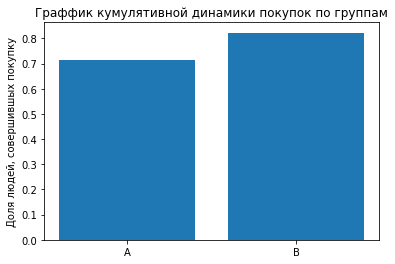

In [62]:
plt.plot(figsize=(16,8))

plt.bar(purchase_part.index, purchase_part.values)

plt.title('Граффик кумулятивной динамики покупок по группам')
plt.ylabel('Доля людей, совершившых покупку')

Доля людей, совершившых покупку в двух группах не сильно отличаются. Для группы А это значение чуть больше 0,7, для группы B - около 0,8. 

In [63]:
#Выведим значение всех пользователей в группах A и B:

all_users_A = all_users.get('A',0)

In [64]:
all_users_B = all_users.get('B',0)

In [65]:
#Выведим значение всех покупателей в группах A и B:

all_purch_A = data_count_purch.get('A',0)

In [66]:
all_purch_A = data_count_purch[data_count_purch['group']=='A']['user_id'].sum()

In [67]:
all_purch_B = data_count_purch[data_count_purch['group']=='B']['user_id'].sum()

In [68]:
#Посчитаем доли покупателей в каждой группе:

part_A, part_B = all_purch_A/all_users_A, all_purch_B/all_users_B

Поскольку значения долевые для статитического анализа будем использовать Z-тест пропорций.

Сформируем нулевую и альтернативную гипотезы:

Нулевая гипотеза: Новая платёжная воронка не увеличит конверсию в покупку.

Альтернативная гипотеза: Новая платёжная воронка увеличит конверсию в покупку.

In [69]:
# проверим предпосылку о достаточном количестве данных:

if (part_A*all_users_A>10)and((1-part_A)*all_users_A>10)and(part_B*all_users_B>10)and((1-part_B)*all_users_B>10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


Раз предпосылка о достаточном количестве данных выполняется, то проведем Z-тест пропорций. Гипотезы уже софрмулированы выше.

In [70]:
z_test, p_value_ztest = proportions_ztest([all_purch_A, all_purch_B], [all_users_A, all_users_B])

alpha = 0.05

print('p-значение:', p_value_ztest)

if p_value_ztest<alpha:
    print('Отвергаем нулевую гипотезу.' 
      'Новая платёжная воронка увеличит конверсию в покупку')
else:
    print('Не удалось отвергнуть нулевую гипотезу.' 
      'Новая платёжная воронка не увеличит конверсию в покупку')

p-значение: 8.707531193152628e-14
Отвергаем нулевую гипотезу.Новая платёжная воронка увеличит конверсию в покупку


В проекте были проверены результаты А/B-теста, чтобы проверить новую платёжную воронку: гипотеза заключалась в том, что новая платёжная воронка увеличит конверсию в покупку. Тест показал, что новая платёжная воронка увеличит конверсию в покупку.